In [1]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import numpy as np
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
# open the benign captures from the IOT devices
amazon_echo = pd.read_pickle('Datasets/IOT23/Benign-Amazon-Echo/zeek_normal.pkl')

## Amazon Echo

In [3]:
amazon_echo.head()

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,label,detailed_label,protocol_num,state_num
0,2018-09-21 09:40:22.965529919,0.0.0.0,68,255.255.255.255,67,udp,8.322388,S0,0,2,656,0,0,benign,missing,0,0
1,2018-09-21 09:40:26.845520020,192.168.2.1,57621,192.168.2.255,57621,udp,19576.598629,S0,0,617,44424,0,0,benign,missing,0,0
2,2018-09-21 09:41:37.732295036,192.168.2.1,5353,224.0.0.251,5353,udp,7.628973,S0,0,1,391,0,0,benign,missing,0,0
3,2018-09-21 09:41:37.732373953,fe80::80e6:50ff:fe12:1464,5353,ff02::fb,5353,udp,7.628974,S0,0,1,411,0,0,benign,missing,0,0
4,2018-09-21 09:41:37.732506990,169.254.15.115,5353,224.0.0.251,5353,udp,7.369418,S0,0,1,391,0,0,benign,missing,0,0


In [4]:
amazon_echo.describe()

,src_port,dst_port,duration,missed_bytes,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,1374.000000,1374.000000,1374.000000,1374.0,1374.000000,1.374000e+03,1374.000000,1.374000e+03,1374.000000,1374.000000
mean,28292.233624,1073.914119,76.559375,0.0,103.873362,8.794371e+03,185.092431,2.600232e+05,0.475983,1.544396
std,21448.604753,3270.789519,646.878562,0.0,3343.205784,1.967368e+05,6463.852208,9.432581e+06,0.612273,2.089894
min,8.000000,0.000000,0.000010,0.0,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000
25%,5353.000000,53.000000,0.015156,0.0,1.000000,7.400000e+01,0.000000,0.000000e+00,0.000000,0.000000
50%,34930.000000,80.000000,0.243638,0.0,2.000000,2.160000e+02,1.000000,8.400000e+01,0.000000,1.000000
75%,47091.250000,443.000000,58.109089,0.0,9.000000,8.400000e+02,2.000000,1.390000e+02,1.000000,1.000000
max,64769.000000,57621.000000,19576.598629,0.0,123657.000000,6.527241e+06,239484.000000,3.496187e+08,2.000000,9.000000


In [5]:
# drop non-informative features
amazon_echo.drop(columns=['label', 'detailed_label', 'missed_bytes'], inplace=True)

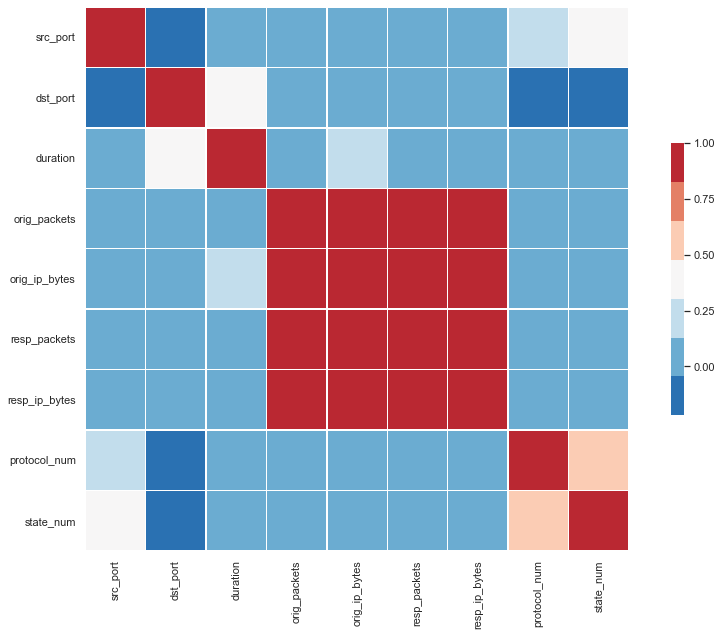

In [6]:
sns.set(style="white")
corr = amazon_echo.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

In [7]:
continuous = ['src_port', 'dst_port', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'protocol_num', 'state_num']
amazon_echo_wo_outliers = amazon_echo[(np.abs(stats.zscore(amazon_echo[continuous])) < 3).all(axis=1)]
amazon_echo_wo_outliers.describe()

,src_port,dst_port,duration,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num
count,1363.000000,1363.000000,1363.000000,1363.00000,1363.000000,1363.000000,1.363000e+03,1363.000000,1363.000000
mean,28138.603815,953.155539,56.748909,7.60675,1674.066764,5.547322,3.857191e+03,0.473955,1.512106
std,21451.689242,1929.876142,334.402714,65.67646,16095.554766,79.671507,1.043113e+05,0.613017,2.041880
min,8.000000,0.000000,0.000010,0.00000,0.000000,0.000000,0.000000e+00,0.000000,0.000000
25%,5353.000000,53.000000,0.015033,1.00000,74.000000,0.000000,0.000000e+00,0.000000,0.000000
50%,34712.000000,80.000000,0.242888,2.00000,216.000000,1.000000,8.400000e+01,0.000000,1.000000
75%,46892.000000,136.000000,57.940088,8.00000,840.000000,2.000000,1.390000e+02,1.000000,1.000000
max,64769.000000,5353.000000,11851.214389,1851.00000,528817.000000,2636.000000,3.835697e+06,2.000000,7.000000


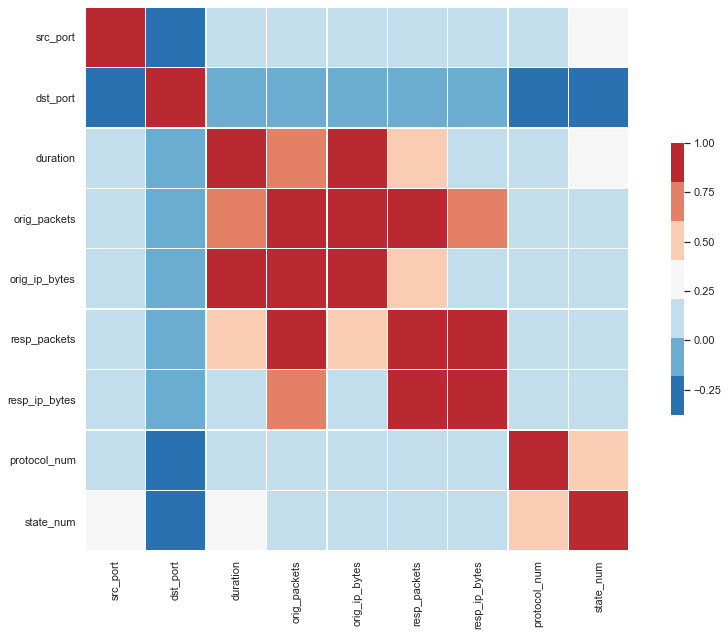

In [8]:
sns.set(style="white")
corr = amazon_echo_wo_outliers.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

## Host level analysis

### Duration and avg time difference between flows per host

In [9]:
amazon_grouped_source_ip_time = amazon_echo.groupby('src_ip').agg({'duration': ['count', 'mean', 'median', 'max', 'min', 'std'], 'date': [lambda group: group.sort_values().diff().mean(), lambda group: group.sort_values().diff().median(), lambda group: group.sort_values().diff().max(), lambda group: group.sort_values().diff().min(), lambda group: group.sort_values().diff().std()]})
amazon_grouped_source_ip_time.columns = ['count', 'duration_mean', 'duration_median', 'duration_max', 'duration_min', 'duration_std', 'mean_time_diff', 'median_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff']
amazon_grouped_source_ip_time = amazon_grouped_source_ip_time.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_source_ip_time

/usr/local/lib/python3.7/site-packages/numpy/lib/nanfunctions.py:1113: RuntimeWarning: Mean of empty slice
  return np.nanmean(a, axis, out=out, keepdims=keepdims)


,src_ip,count,duration_mean,duration_median,duration_max,duration_min,duration_std,mean_time_diff,median_time_diff,max_time_diff,min_time_diff,std_time_diff
0,192.168.2.3,979,75.956159,0.118298,11851.214389,0.000010,444.313429,00:00:18.253228,00:00:00.049586,00:04:59.807264,00:00:00.000002,00:00:52.627639
1,0.0.0.0,153,60.147332,59.430869,188.262180,8.322388,11.623248,00:02:08.403643,00:02:07.893740,00:04:16.724261,00:01:16.533275,00:00:11.309331
2,192.168.2.1,51,391.334260,7.628973,19576.598629,0.100990,2740.205736,00:06:30.492747,00:04:19.304500,00:15:09.969765,00:00:13.036051,00:05:42.370194
3,169.254.15.115,51,7.369418,7.013791,20.411436,0.100984,3.382637,00:06:29.075011,00:04:19.304500,00:15:09.969779,00:00:13.036313,00:05:43.746615
4,fe80::80e6:50ff:fe12:1464,50,7.628974,7.321328,20.411316,0.100977,3.249482,00:06:37.015317,00:04:35.125993,00:15:09.969743,00:00:13.036051,00:05:42.765028
5,fe80::482:6d20:b3e:adf4,15,4.018468,0.124769,17.250803,0.002716,5.666301,00:00:08.976808,00:00:00.267019,00:00:34.626947,00:00:00.000001,00:00:13.377206
6,fe80::4eef:c0ff:fe27:561e,12,23.593763,26.964502,38.175279,7.550691,8.873173,00:09:51.893625,00:00:31.996907,01:43:24.293062,00:00:00.001798,00:31:01.571964
7,fe80::1847:a1bd:8d13:f43c,8,9.554011,2.530449,59.390351,1.023844,20.155887,00:00:17.232763,00:00:14.234038,00:00:34.509592,00:00:00.000735,00:00:14.479750
8,192.168.69.73,7,2.896521,3.379273,4.094252,0.000010,1.390858,00:00:20.445888,00:00:22.630555,00:00:34.403316,00:00:00.105968,00:00:13.506459
9,192.168.69.192,7,6.466902,4.696996,13.654073,1.038254,5.414228,00:00:20.706823,00:00:25.329700,00:00:39.574230,00:00:00.688812,00:00:15.593624


### Bytes and packets statistics per host

In [10]:
amazon_grouped_source_ip_pb = amazon_echo.groupby('src_ip').agg({'orig_packets': ['count', 'mean', 'median', 'max', 'min', 'std'], 'orig_ip_bytes': ['mean', 'median', 'max', 'min', 'std'], 'resp_packets': ['mean', 'median', 'max', 'min', 'std'], 'resp_ip_bytes': ['mean', 'median', 'max', 'min', 'std']})
amazon_grouped_source_ip_pb.columns = ['count', 'orig_packets_mean', 'orig_packets_median', 'orig_packets_max', 'orig_packets_min', 'orig_packets_std', 'orig_bytes_mean', 'orig_bytes_median', 'orig_bytes_max', 'orig_bytes_min', 'orig_bytes_std', 'resp_packets_mean', 'resp_packets_median', 'resp_packets_max', 'resp_packets_min', 'resp_packets_std', 'resp_bytes_mean', 'resp_bytes_median', 'resp_bytes_max', 'resp_bytes_min', 'resp_bytes_std']
amazon_grouped_source_ip_pb = amazon_grouped_source_ip_pb.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_source_ip_pb

,src_ip,count,orig_packets_mean,orig_packets_median,orig_packets_max,orig_packets_min,orig_packets_std,orig_bytes_mean,orig_bytes_median,orig_bytes_max,...,resp_packets_mean,resp_packets_median,resp_packets_max,resp_packets_min,resp_packets_std,resp_bytes_mean,resp_bytes_median,resp_bytes_max,resp_bytes_min,resp_bytes_std
0,192.168.2.3,979,142.687436,1.0,123657,0,3960.508469,11583.753830,76.0,6527241,...,259.766088,1.0,239484,0,7657.471116,364934.017365,112,349618679,0,1.117454e+07
1,0.0.0.0,153,10.058824,10.0,22,2,1.204352,3299.333333,3280.0,7219,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
2,192.168.2.1,51,15.000000,4.0,617,1,86.009302,1455.137255,618.0,44424,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
3,169.254.15.115,51,2.901961,3.0,11,1,2.100047,596.411765,515.0,1637,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
4,fe80::80e6:50ff:fe12:1464,50,2.960000,3.5,11,1,2.156717,654.960000,675.0,1857,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
5,fe80::482:6d20:b3e:adf4,15,3.933333,1.0,32,1,7.878240,1006.000000,206.0,9988,...,0.200000,0.0,1,0,0.414039,12.800000,0,64,0,2.649852e+01
6,fe80::4eef:c0ff:fe27:561e,12,3.833333,2.0,17,1,4.687184,477.750000,167.0,2634,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
7,fe80::1847:a1bd:8d13:f43c,8,2.375000,2.0,4,1,0.916125,391.875000,372.5,703,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
8,192.168.69.73,7,2.142857,3.0,3,1,1.069045,420.714286,480.0,643,...,0.000000,0.0,0,0,0.000000,0.000000,0,0,0,0.000000e+00
9,192.168.69.192,7,4.571429,3.0,18,0,6.187545,1335.714286,641.0,5919,...,0.285714,0.0,2,0,0.755929,164.571429,0,1152,0,4.354151e+02


### Destination ips and ports, as well as protocols statistics per flow

In [11]:
amazon_grouped_source_ip_net = amazon_echo.groupby('src_ip').agg({'dst_ip': ['count', 'nunique'], 'src_port': 'nunique', 'dst_port': 'nunique', 'protocol': 'nunique'})
amazon_grouped_source_ip_net.columns = ['count', 'number of unique destination ips', 'number of unique source ports', 'number of unique destination ports', 'number of unique protocols']
amazon_grouped_source_ip_net = amazon_grouped_source_ip_net.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_source_ip_net

,src_ip,count,number of unique destination ips,number of unique source ports,number of unique destination ports,number of unique protocols
0,192.168.2.3,979,120,763,7,3
1,0.0.0.0,153,1,1,1,1
2,192.168.2.1,51,2,2,2,1
3,169.254.15.115,51,1,1,1,1
4,fe80::80e6:50ff:fe12:1464,50,1,1,1,1
5,fe80::482:6d20:b3e:adf4,15,6,5,5,2
6,fe80::4eef:c0ff:fe27:561e,12,3,3,3,2
7,fe80::1847:a1bd:8d13:f43c,8,2,2,2,2
8,192.168.69.73,7,2,1,1,1
9,192.168.69.192,7,2,2,2,1


### Now let's keep only the ip with the greatest number of flows 

In [12]:
amazon_echo_ip = amazon_echo[amazon_echo['src_ip'] == '192.168.2.3'].reset_index(drop=True)
amazon_echo_ip['orig_packets_per_s'] = amazon_echo_ip['orig_packets'] / amazon_echo_ip['duration']
amazon_echo_ip['resp_packets_per_s'] = amazon_echo_ip['resp_packets'] / amazon_echo_ip['duration']
amazon_echo_ip['orig_bytes_per_s'] = amazon_echo_ip['orig_ip_bytes'] / amazon_echo_ip['duration']
amazon_echo_ip['resp_bytes_per_s'] = amazon_echo_ip['resp_ip_bytes'] / amazon_echo_ip['duration']
amazon_echo_ip['packets_diff'] = amazon_echo_ip['orig_packets'] - amazon_echo_ip['resp_packets']
amazon_echo_ip['bytes_diff'] = amazon_echo_ip['orig_ip_bytes'] - amazon_echo_ip['resp_ip_bytes']
amazon_echo_ip['packets_per_s_diff'] = amazon_echo_ip['orig_packets_per_s'] - amazon_echo_ip['resp_packets_per_s']
amazon_echo_ip['bytes_per_s_diff'] = amazon_echo_ip['orig_bytes_per_s'] - amazon_echo_ip['resp_bytes_per_s']
amazon_echo_ip

,date,src_ip,src_port,dst_ip,dst_port,protocol,duration,state,orig_packets,orig_ip_bytes,...,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
0,2018-09-21 09:52:28.881175041,192.168.2.3,68,192.168.2.1,67,udp,0.004204,SHR,0,0,...,0,4,0.000000,475.737393,0.000000,156041.864891,-2,-656,-475.737393,-156041.864891
1,2018-09-21 09:52:29.066996098,192.168.2.3,5353,224.0.0.251,5353,udp,38.595360,S0,29,4700,...,0,0,0.751386,0.000000,121.776296,0.000000,29,4700,0.751386,121.776296
2,2018-09-21 09:52:29.331990957,192.168.2.3,59744,192.168.2.1,53,udp,0.011518,SF,1,71,...,0,1,86.820629,86.820629,6164.264629,12068.067373,0,-68,0.000000,-5903.802744
3,2018-09-21 09:52:29.337398052,192.168.2.3,55971,192.168.2.1,53,udp,0.015621,SF,1,68,...,0,1,64.016388,64.016388,4353.114397,5377.376608,0,-16,0.000000,-1024.262211
4,2018-09-21 09:52:29.337702036,192.168.2.3,41548,192.168.2.1,53,udp,0.015581,SF,1,68,...,0,1,64.180733,64.180733,4364.289840,8471.856749,0,-64,0.000000,-4107.566908
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
974,2018-09-21 14:48:46.339190006,192.168.2.3,55013,176.32.98.203,80,tcp,0.228273,SF,4,315,...,1,1,17.522878,17.522878,1379.926667,1778.572148,0,-91,0.000000,-398.645482
975,2018-09-21 14:48:46.339195967,192.168.2.3,34940,176.32.98.203,80,tcp,0.230678,SF,4,337,...,1,1,17.340188,17.340188,1460.910880,2336.590399,0,-202,0.000000,-875.679519
976,2018-09-21 14:50:00.492599010,192.168.2.3,47764,192.168.2.1,53,udp,0.013025,SF,1,74,...,0,1,76.775432,76.775432,5681.381958,6909.788868,0,-16,0.000000,-1228.406910
977,2018-09-21 14:50:00.492607117,192.168.2.3,51044,52.46.156.47,443,tcp,0.107446,RSTR,2,133,...,1,5,18.614001,9.307001,1237.831097,372.280029,1,93,9.307001,865.551068


In [13]:
amazon_echo_ip.describe()

,src_port,dst_port,duration,orig_packets,orig_ip_bytes,resp_packets,resp_ip_bytes,protocol_num,state_num,orig_packets_per_s,resp_packets_per_s,orig_bytes_per_s,resp_bytes_per_s,packets_diff,bytes_diff,packets_per_s_diff,bytes_per_s_diff
count,979.000000,979.000000,979.000000,979.000000,9.790000e+02,979.000000,9.790000e+02,979.000000,979.000000,979.000000,979.000000,9.790000e+02,9.790000e+02,979.000000,9.790000e+02,979.000000,9.790000e+02
mean,38260.986721,165.898876,75.956159,142.687436,1.158375e+04,259.766088,3.649340e+05,0.614913,2.083759,6617.631435,78.135146,5.028303e+05,9.107289e+03,-117.078652,-3.533503e+05,6539.496289,4.937230e+05
std,16823.584864,515.532450,444.313429,3960.508469,2.330406e+05,7657.471116,1.117454e+07,0.599780,2.209186,24710.392826,197.378297,1.878017e+06,4.929462e+04,3702.180876,1.096585e+07,24730.319233,1.880930e+06
min,8.000000,0.000000,0.000010,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,-115827.000000,-3.430914e+08,-475.737393,-1.394747e+06
25%,33407.000000,53.000000,0.012434,1.000000,6.800000e+01,1.000000,7.600000e+01,0.000000,1.000000,2.828787,0.019992,3.969520e+02,3.421942e+00,0.000000,-6.800000e+01,0.000000,-1.370450e+03
50%,40663.000000,80.000000,0.118298,1.000000,7.600000e+01,1.000000,1.120000e+02,1.000000,1.000000,17.646877,15.169615,1.536827e+03,1.636959e+03,0.000000,-1.600000e+01,0.000000,-1.316099e+00
75%,50424.500000,123.000000,3.330390,4.000000,3.370000e+02,4.000000,5.390000e+02,1.000000,3.000000,93.725277,80.570508,6.474512e+03,7.705686e+03,1.000000,7.600000e+01,0.474082,3.369001e+01
max,64769.000000,5353.000000,11851.214389,123657.000000,6.527241e+06,239484.000000,3.496187e+08,2.000000,9.000000,100000.000000,2136.752137,7.600000e+06,1.421281e+06,782.000000,8.450200e+05,100000.000000,7.600000e+06


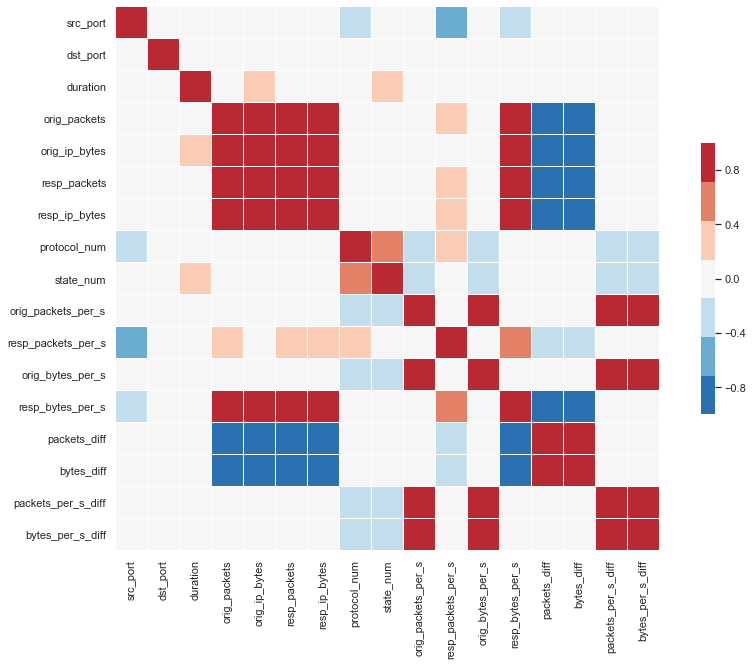

In [14]:
sns.set(style="white")
corr = amazon_echo_ip.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

### Remove the outliers

In [ ]:
continuous = ['duration', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'protocol_num' ,'state_num', 'orig_packets_per_s', 'resp_packets_per_s', 'orig_bytes_per_s', 'resp_bytes_per_s', 'packets_diff', 'bytes_diff', 'packets_per_s_diff', 'bytes_per_s_diff']
amazon_echo_ip = amazon_echo_ip[(np.abs(stats.zscore(amazon_echo_ip[continuous])) < 3).all(axis=1)]
amazon_echo_ip.describe()

### Duration against time 

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=amazon_echo_ip, color="coral")
plt.grid(axis='y')

### Number of bytes against time 

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=amazon_echo_ip, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=amazon_echo_ip, label='resp_ip_bytes', color="red")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

### Number of packets against time 

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=amazon_echo_ip, label='orig_packets')
sns.lineplot(x="date", y="resp_packets", data=amazon_echo_ip, label='resp_packets', color="red")
plt.grid(axis='y')
plt.ylabel("Number of packets")

### Originator's vs Responder's Packets/sec and Bytes/sec 

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=amazon_echo_ip, label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=amazon_echo_ip, label='resp_packets / sec', color="red")
plt.grid(axis='y')
plt.ylabel("Packets / sec")

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=amazon_echo_ip, label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=amazon_echo_ip, label='resp_bytes / sec', color="red")
plt.grid(axis='y')
plt.ylabel("Bytes / sec")

### Difference between sent and received packets

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_diff", data=amazon_echo_ip, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets")

### Difference between sent and received bytes

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_diff", data=amazon_echo_ip, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes")

### Difference between sent and received rates

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_per_s_diff", data=amazon_echo_ip)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets/s")

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_per_s_diff", data=amazon_echo_ip)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes/s")

### Protocol type distribution

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=amazon_echo_ip)
plt.grid(axis='y')

### Packets sent per protocol

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_packets", data=amazon_echo_ip)
plt.grid(axis='y')

### Packets received per protocol 

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_packets", data=amazon_echo_ip)
plt.grid(axis='y')

### Bytes sent per protocol

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_ip_bytes", data=amazon_echo_ip)
plt.grid(axis='y')

### Bytes received per protocol

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_ip_bytes", data=amazon_echo_ip)
plt.grid(axis='y')

### Duration per protocol

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="duration", data=amazon_echo_ip)
plt.grid(axis='y')

## Connection level analysis

### Packets and bytes statistics per connection

In [ ]:
amazon_grouped_connection_pb = amazon_echo.groupby(['src_ip', 'dst_ip']).agg({'orig_packets': ['count', 'mean', 'median', 'max', 'min', 'std'], 'orig_ip_bytes': ['mean', 'median', 'max', 'min', 'std'], 'resp_packets': ['mean', 'median', 'max', 'min', 'std'], 'resp_ip_bytes': ['mean', 'median', 'max', 'min', 'std']})
amazon_grouped_connection_pb.columns = ['count', 'orig_packets_mean', 'orig_packets_median', 'orig_packets_max', 'orig_packets_min', 'orig_packets_std', 'orig_bytes_mean', 'orig_bytes_median', 'orig_bytes_max', 'orig_bytes_min', 'orig_bytes_std', 'resp_packets_mean', 'resp_packets_median', 'resp_packets_max', 'resp_packets_min', 'resp_packets_std', 'resp_bytes_mean', 'resp_bytes_median', 'resp_bytes_max', 'resp_bytes_min', 'resp_bytes_std']
amazon_grouped_connection_pb = amazon_grouped_connection_pb.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_connection_pb

### Duration and avg time difference between flows per connection

In [ ]:
amazon_grouped_connection_time = amazon_echo.groupby(['src_ip', 'dst_ip']).agg({'duration': ['count', 'mean', 'median', 'max', 'min', 'std'], 'date': [lambda group: group.sort_values().diff().mean(), lambda group: group.sort_values().diff().median(), lambda group: group.sort_values().diff().max(), lambda group: group.sort_values().diff().min(), lambda group: group.sort_values().diff().std()]})
amazon_grouped_connection_time.columns = ['count', 'duration_mean', 'duration_median', 'duration_max', 'duration_min', 'duration_std', 'mean_time_diff', 'median_time_diff', 'max_time_diff', 'min_time_diff', 'std_time_diff']
amazon_grouped_connection_time = amazon_grouped_connection_time.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_connection_time

### Source and destination ports, as well as protocol statistics

In [ ]:
amazon_grouped_connection_net = amazon_echo.groupby(['src_ip', 'dst_ip']).agg({'src_port': ['count', 'nunique'], 'dst_port': 'nunique', 'protocol': 'nunique'})
amazon_grouped_connection_net.columns = ['count', 'number of unique source ports', 'number of unique destination ports', 'number of unique protocols']
amazon_grouped_connection_net = amazon_grouped_connection_net.sort_values(by=['count'], ascending=False).reset_index()
amazon_grouped_connection_net

### Now let's keep only the ip pair with the greatest number of flows

In [ ]:
amazon_echo_conn = amazon_echo.loc[(amazon_echo['src_ip'] == '192.168.2.3') & (amazon_echo['dst_ip'] == '192.168.2.1')].reset_index(drop=True)
amazon_echo_conn['orig_packets_per_s'] = amazon_echo_conn['orig_packets'] / amazon_echo_conn['duration']
amazon_echo_conn['resp_packets_per_s'] = amazon_echo_conn['resp_packets'] / amazon_echo_conn['duration']
amazon_echo_conn['orig_bytes_per_s'] = amazon_echo_conn['orig_ip_bytes'] / amazon_echo_conn['duration']
amazon_echo_conn['resp_bytes_per_s'] = amazon_echo_conn['resp_ip_bytes'] / amazon_echo_conn['duration']
amazon_echo_conn['packets_diff'] = amazon_echo_conn['orig_packets'] - amazon_echo_conn['resp_packets']
amazon_echo_conn['bytes_diff'] = amazon_echo_conn['orig_ip_bytes'] - amazon_echo_conn['resp_ip_bytes']
amazon_echo_conn['packets_per_s_diff'] = amazon_echo_conn['orig_packets_per_s'] - amazon_echo_conn['resp_packets_per_s']
amazon_echo_conn['bytes_per_s_diff'] = amazon_echo_conn['orig_bytes_per_s'] - amazon_echo_conn['resp_bytes_per_s']
amazon_echo_conn

In [ ]:
amazon_echo_conn.describe()

In [ ]:
sns.set(style="white")
corr = amazon_echo_conn.corr()
cmap = sns.color_palette("RdBu_r", 7)
plt.figure(figsize=(15, 10))
sns.heatmap(corr, cmap=cmap, robust=True, square=True, xticklabels=corr.columns.values, yticklabels=corr.columns.values, linewidths=0.5, cbar_kws={"shrink": .5})

### Remove the outliers

In [ ]:
continuous = ['duration', 'orig_packets', 'orig_ip_bytes', 'resp_packets', 'resp_ip_bytes', 'protocol_num' ,'state_num', 'orig_packets_per_s', 'resp_packets_per_s', 'orig_bytes_per_s', 'resp_bytes_per_s', 'packets_diff', 'bytes_diff', 'packets_per_s_diff', 'bytes_per_s_diff']
amazon_echo_conn = amazon_echo_conn[(np.abs(stats.zscore(amazon_echo_conn[continuous])) < 3).all(axis=1)]
amazon_echo_conn.describe()

### Duration against time 

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="duration", data=amazon_echo_conn, color="coral")
plt.grid(axis='y')

### Number of bytes against time 

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_ip_bytes", data=amazon_echo_conn, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_ip_bytes", data=amazon_echo_conn, label='resp_ip_bytes', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of bytes")

### Number of packets against time 

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets", data=amazon_echo_conn, label='orig_ip_bytes')
sns.lineplot(x="date", y="resp_packets", data=amazon_echo_conn, label='resp_ip_bytes', color="coral")
plt.grid(axis='y')
plt.ylabel("Number of packets")

### Originator's vs Responder's packets/sec and bytes/sec 

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_packets_per_s", data=amazon_echo_conn, label='orig_packets / sec')
sns.lineplot(x="date", y="resp_packets_per_s", data=amazon_echo_conn, label='resp_packets / sec', color='red')
plt.grid(axis='y')
plt.ylabel("Packets / sec")

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="orig_bytes_per_s", data=amazon_echo_conn, label='orig_bytes / sec')
sns.lineplot(x="date", y="resp_bytes_per_s", data=amazon_echo_conn, label='resp_bytes / sec', color='red')
plt.grid(axis='y')
plt.ylabel("Bytes / sec")

### Difference between originator's and responder's packets and bytes 

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_diff", data=amazon_echo_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets")

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_diff", data=amazon_echo_conn, color="coral")
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes")

### Difference between originator's and responder's packets and bytes rates

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="packets_per_s_diff", data=amazon_echo_conn)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's packets")

In [ ]:
plt.figure(figsize=(16, 6))
sns.lineplot(x="date", y="bytes_per_s_diff", data=amazon_echo_conn)
plt.grid(axis='y')
plt.ylabel("Difference between originator's and responder's bytes")

### Protocol distribution

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="protocol", data=amazon_echo_conn)
plt.grid(axis='y')

### Packets sent per protocol

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_packets", data=amazon_echo_conn)
plt.grid(axis='y')

### Packets received per protocol

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_packets", data=amazon_echo_conn)
plt.grid(axis='y')

### Bytes sent per protocol

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="orig_ip_bytes", data=amazon_echo_conn)
plt.grid(axis='y')

### Bytes received per protocol

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="resp_ip_bytes", data=amazon_echo_conn)
plt.grid(axis='y')

### Duration of connection per protocol

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(x="protocol", y="duration", data=amazon_echo_conn)
plt.grid(axis='y')